In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1) As per 538, the Jets have a 40% chance of winning next week's game. What distribution can we use to map out this experiment? What inputs will go into this distribution? What are the PMFs and CDFs of all of the possible outcomes in the sample space for this scenario?

In [80]:
x = stats.bernoulli(p=0.4)
print("Bernoulli")
print("PMF: ",x.pmf(0), "and" , x.pmf(1) )

print("CDF:",x.cdf(0),"and", x.cdf(1))


Bernoulli
PMF:  0.6 and 0.4
CDF: 0.6 and 1.0


2) If there are 16 games in a season, and the Jets have a 40% chance of winning each game, what is the expected number of games that they will win (pretend the season hasn't started yet)? Please return the exact value if it's not an integer.

In [85]:
x = stats.binom(n=16, p=0.4)
x.rvs()

7

3) What are the odds that they win 5 games or less this season? (again, pretend the season hasn't started yet)

In [28]:
x.cdf(5)

0.32884041250897894

4) What are the odds that it will take them exactly 3 games to win their first game?

In [30]:
x.pmf(3)

0.04680952735334424

5) What are the odds that it will take them at least 5 games to win their first game?

In [35]:

1- x.cdf(4)

0.83343261564928

6) Say they need to win 10 games or more to make the playoffs (out of 16). What are their odds of making the playoffs?

In [36]:
1- x.cdf(9)

0.05831894499327994

7) Now find the PMF values of the Jets winning 0 - 16 games. Which result has the highest chance of occuring, and what is the PMF of that result?

In [113]:
import statistics
a = []
for i in range(16):
    a.append(x.pmf(i))
print(a)
print("There is no result has the higest chance of occuring, all 16 elements are equally common values")


[0.00028211099074559984, 0.0030091839012863987, 0.015045919506432021, 0.04680952735334424, 0.10142064259891244, 0.1622730281582597, 0.19833370108231732, 0.1888892391260163, 0.14166692934451225, 0.08395077294489608, 0.03917702737428492, 0.01424619177246725, 0.003957275492352022, 0.0008117488189440041, 0.00011596411699200047, 1.0307921510400008e-05]
There is no result has the higest chance of occuring, all 16 elements are equally common values


6 games -~20%

8) Using a seed of 42 (like below), simulate 100 16-game seasons for the Jets. Plot the histogram and boxplot for the result. What is the mean number of wins in your simulated 100 seasons? What is the median? What is the standard deviation? Is the mean the same or different than the expected number of games that they will win? Why or why not?

(array([ 1.,  8., 12., 19., 17., 16., 14.,  7.,  5.,  1.]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <a list of 10 Patch objects>)

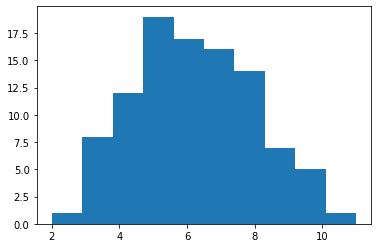

In [114]:
np.random.seed(42)
result = x.rvs(size = 100)
plt.hist(result)

{'whiskers': [<matplotlib.lines.Line2D at 0x26b4c930d68>,
 'caps': [<matplotlib.lines.Line2D at 0x26b4c93a4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b4c930978>],
 'medians': [<matplotlib.lines.Line2D at 0x26b4c93ab38>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b4c93ae80>],
 'means': []}

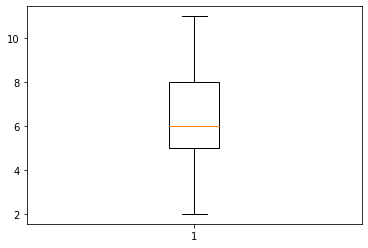

In [115]:
plt.boxplot(result)

In [123]:
print("mean:",result.mean())
print("median",np.median(result))
print("sd",np.std(result))
print("expected value:",16*0.4)
print("Mean and expected value is different")

mean: 6.19
median 6.0
sd 1.978357904930248
expected value: 6.4


9) Imagine they made the playoffs. Wow! Now the odds of winning each game has gone down to 25% because the competition is harder. They need to win all four games remaining to win the Super Bowl. What are their odds of winning the Super Bowl?

In [61]:
c = stats.binom(n = 16, p = 0.25)

1 - c.cdf(3)

0.5950128899421544

10) Given what we discussed in class, why might this example not follow a binomial distribution? Or - what would cause it to not follow a binomial distribution?

The probability of success and failure is differnet  would cause it to not follow a binomial distribution


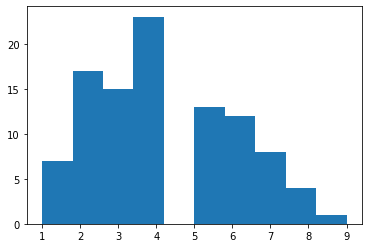

In [66]:
result = c.rvs(size = 100)
plt.hist(result)
print("The probability of success and failure is differnet, and it would cause it to not follow a binomial distribution")

11) Say that, as per polling, that Joe Biden has a 50% chance of winning the Iowa primary in February. If I poll ten voters, what is the probability that exactly five of them will vote for him?

In [67]:
h = stats.binom(n = 10, p = 0.5)
h.pmf(5)

0.24609375000000025

12) What is the probabilty that between three and five of the voters will vote for him?

In [68]:
h.pmf(3) + h.pmf(4) + h.pmf(5)

0.5683593750000006

13) What are the odds that the second person I ask will vote for Joe Biden?

In [74]:
e = stats.geom(0.5)
e.pmf(2)

0.25

14) What are the odds that the second person I ask is the first person I speak to who will vote for Joe Biden?

In [78]:
n = stats.geom(e.pmf(2))
n.pmf(1)


0.25

15) Stock A has a 70% chance of going down next year, which would cost your portfolio \\$100,000 if that were to happen. It has a 30% chance of going up, which would bring $500,000 to your portfolio. Should you invest in Stock A? What is your expected net return in this scenario? 

In [76]:
result = 0.7 * -100000 + 0.3 * 500000
print("Yes, the net value is", result)

Yes, the net value is 80000.0
